In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
from sklearn.model_selection import train_test_split
import seaborn as sns



In [9]:
mush =pd.read_csv('/workspaces/dsi_2022-02/Mushroom/mushrooms.csv')

In [10]:
##This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms 
##in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981).
##Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.
##This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining 
##the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

###Questions :
    
##What types of machine learning models perform best on this dataset?

-##Which features are most indicative of a poisonous mushroom?

 



In [11]:
from sklearn.model_selection import train_test_split


In [12]:
mush.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [ ]:
mush.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
##Mushroom class is almost balanced between the two types (edible and poisonous
## need to convert the datatype to category 

In [ ]:

for i in mush.columns:
    mush[i] = mush[i].astype('category')
    print(mush[i].value_counts())
    


e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [ ]:
###(veil-type) is one value category, so it is not useful. I will remove it.

mush.drop(columns='veil-type', inplace=True)
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

In [ ]:
mush.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='class', ylabel='count'>

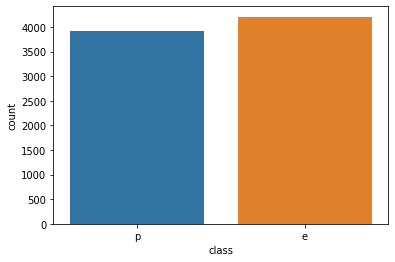

In [18]:
sns.countplot(mush['class'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mush.drop("class", axis=1), mush["class"])

In [ ]:
X_train.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5114,x,s,b,t,f,f,c,b,w,t,...,s,w,w,p,w,o,p,h,v,g
7551,k,s,e,f,y,f,c,n,b,t,...,s,w,p,p,w,o,e,w,v,p
699,f,s,n,f,n,f,w,b,n,t,...,s,w,w,p,w,o,e,n,a,g
4972,x,f,y,f,f,f,c,b,p,e,...,k,b,n,p,w,o,l,h,y,p
2668,x,f,e,t,n,f,c,b,w,t,...,s,g,g,p,w,o,p,n,y,d


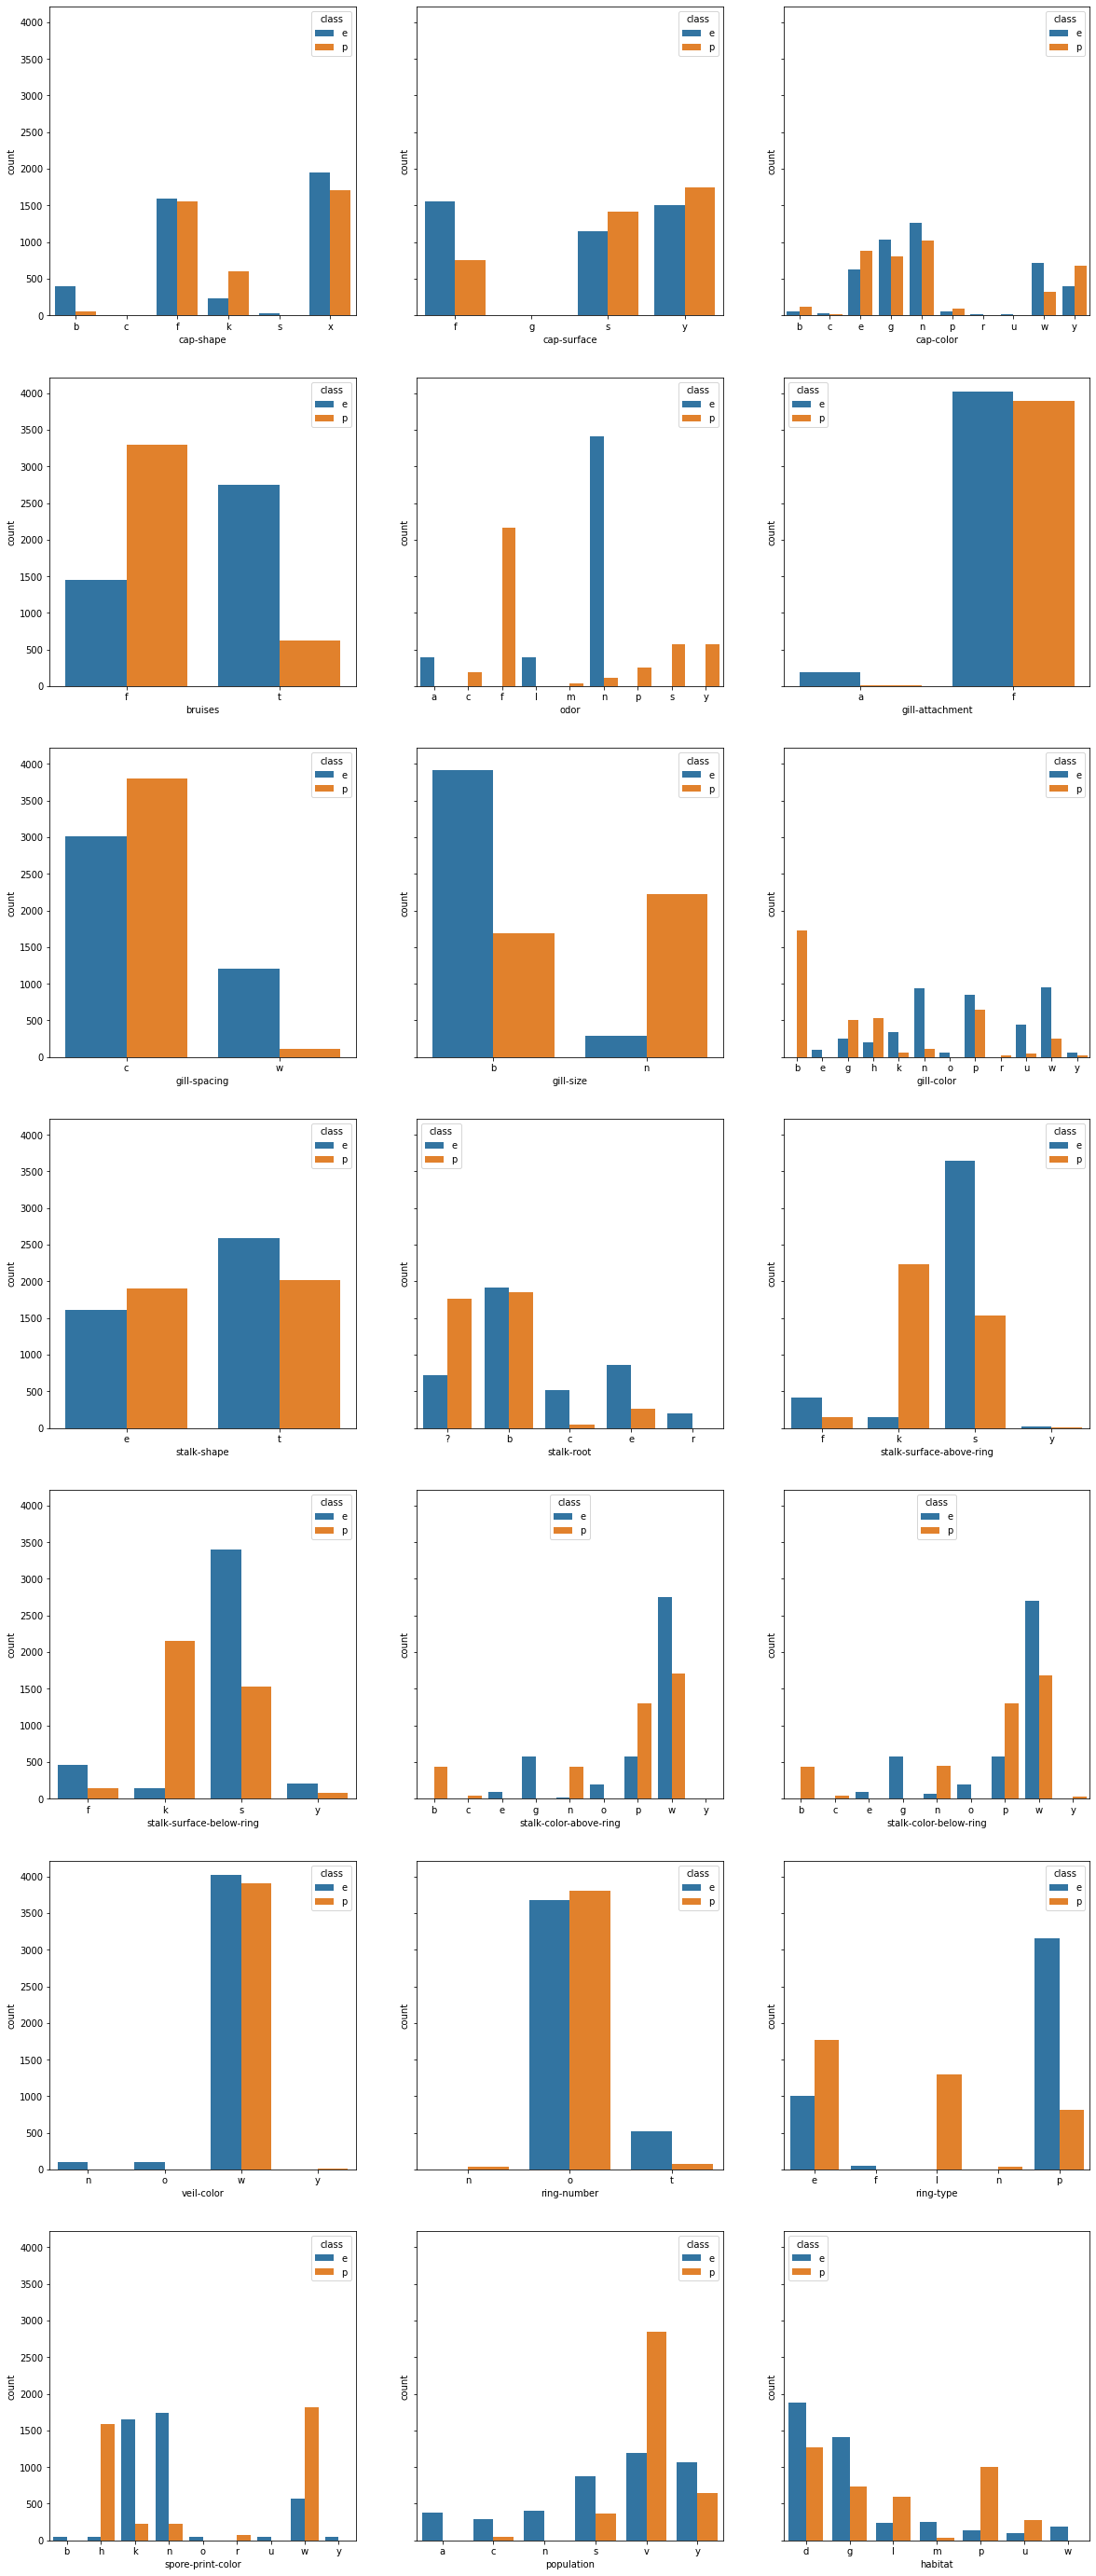

In [ ]:
fig, axes = plt.subplots(nrows=7,ncols=3, figsize=(20,50),sharey=True)
idx = 0
for col in mush.columns[1:]:
    sns.countplot(data=mush,x=col, hue='class' ,ax=axes[idx//3][idx%3])
    idx += 1

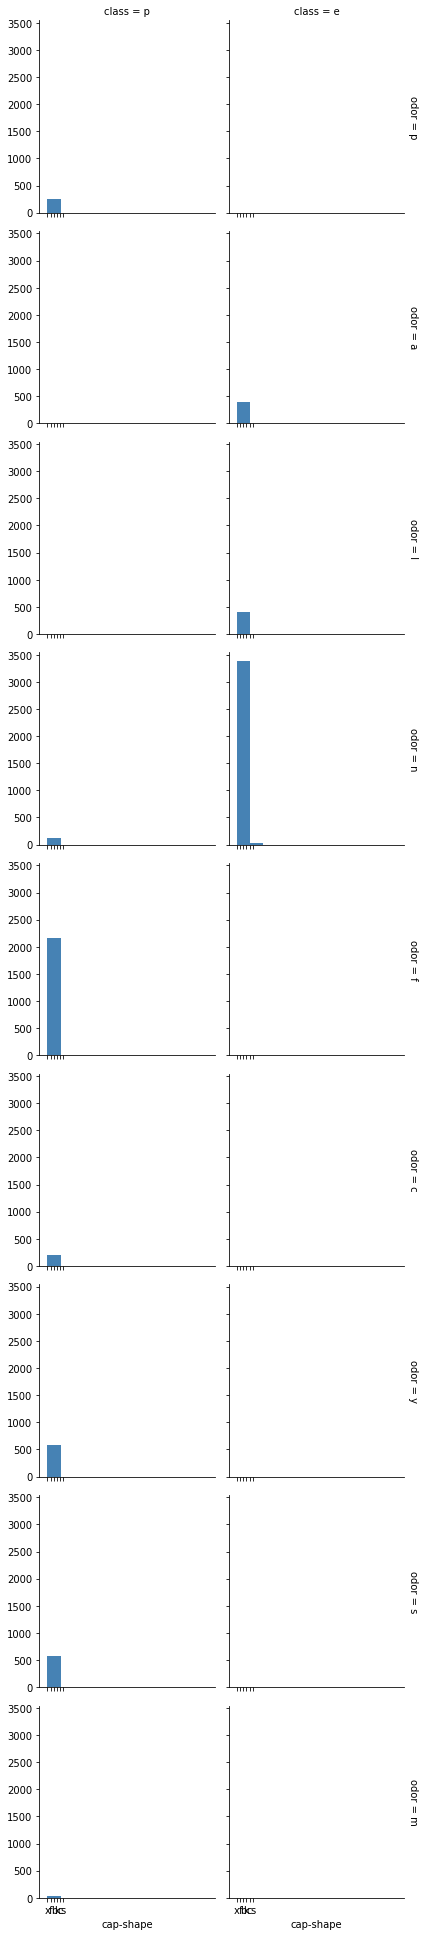

In [21]:
g =sns.FacetGrid(mush, row="odor", col="class",margin_titles=True)
bins =np.linspace(0, 50, 13)
g.map(plt.hist, "cap-shape",color="steelblue", bins=bins ,lw=0)

In [ ]:
##There are some types that are most likely safe to eat, which are:

#mushroom with almond odor or no-odor.
#mushroom with bruises.
#mushroom with gill attached
#mushroom with broad gill size
#brown, purple and white colored mushroom
#mushroom with club, equal or rooted stalk-root
#when stalk surface (above or below ring) is fibrous or smooth
#when stalk color (above or below ring) is red, white, green or orange
##mushroom with brown or orange veil-color (which is rare)
##mushroom with ring number two
##mushroom with ring type pendant or flaring
##any spore-print-color are often edible except (chocolate, green and white)
##the abundant, clustered or numerous population are often safe to eat
##mushroom habitat: waste or meadows#

In [ ]:
##Data processing 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in mush.columns:
    mush = mush.apply(le.fit_transform)


In [ ]:
dfX = mush.iloc[:,1:]
dfY = mush['class']
dfX.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [ ]:


##To test the whole data, we need to split it by folds (no need stratified folds cause the two types are almost balanced).

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold
skf = KFold(n_splits=5, shuffle=True)

In [ ]:
accurecy_report = dict()
def trainwith(modelname):
    print(f'using model: {modelname} '.center(100,'='),'\n')
    idx = 0
    model_accurecy =[]
    for _train,_test in skf.split(dfX, dfY):
        idx += 1
        print(f'Fold Number {idx} '.center(100,'='), '\n')
        modelname.fit(dfX.iloc[_train],dfY.iloc[_train])
        print('Confusion Matrix'.center(70,'-'), '\n')
        ypred = modelname.predict(dfX.iloc[_test])
        print(confusion_matrix(dfY.iloc[_test],ypred), '\n')
        print('Classification Report'.center(70,'-'), '\n')
        print(classification_report(dfY.iloc[_test],ypred))
        model_accurecy.append(accuracy_score(dfY.iloc[_test],ypred))
    print('='*100)
    print('The average accurecy of this model is {:.02f}%'.format(np.array(model_accurecy).mean()*100))
    accurecy_report[modelname] = round(np.array(model_accurecy).mean()*100,2)    


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
rf_model = RandomForestClassifier()
trainwith(rf_model)


===============================using model: RandomForestClassifier() =============================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[846   0]
 [  0 779]] 

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       846
           1       1.00      1.00      1.00       779

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 

[[847   0]
 [  0 778]] 

------------------------Classification Report------------------------- 

              precisio

In [ ]:
skf = KFold(n_splits=10, shuffle=True)

In [ ]:
## with 10 folds 
rf_model = RandomForestClassifier()
trainwith(rf_model)

In [ ]:
## random forest with 70-30

In [ ]:
##Model NLP, RandomForest and DecisionTree have the best accuracy with 100%, #
# but NLP is not the best performance. So, better to use RandomForestClassifier or DecisionTreeClassifier
# #to classify any new Mushroom class.
##Random forest adds additional randomness to the model while growing trees. When splitting a node, it searches for the best feature among a random subset of features instead of looking for the most important feature. 
##Thus, it reduces the overfitting problem in decision trees and lessens the variance, improving accuracy.

